<a href="https://colab.research.google.com/github/kimdodo-me/my_project/blob/main/%EA%B8%B0%EC%97%85%EA%B0%80%EC%B9%98%EC%97%90_%EC%98%81%ED%96%A5%EC%9D%84_%EB%AF%B8%EC%B9%98%EB%8A%94_%EC%A0%95%EC%84%B1%EB%B3%80%EC%88%98%EC%99%80_%EC%A0%95%EB%9F%89%EB%B3%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 금융프로그래밍2 기말 프로젝트 
**금융 16 지승호**, **금융 14 김동연**

**CHAPRT Ⅰ 오너리스크(정성변수)가 기업가치에 미치는 영향**

**CHAPTER Ⅱ 오너리스크 외(정량변수) 주가에 영향을 미치는 변수**

**CHAPRT Ⅰ 오너리스크가 기업가치에 미치는 영향**


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
myfile = files.upload()

Saving owner_risk_list.xlsx to owner_risk_list.xlsx


오너리스크 사례를 정리한 엑셀 불러오기

KINDS(Korea Integrated News Database System)를 통해 검색한 기사에 최초 게재된 날짜를 사건 발생일로 지정하여 기업의 오너리스크 사례 수집

In [ ]:
owner_risk_list=pd.read_excel('owner_risk_list.xlsx')
owner_risk_list.iloc[0,0]=185750 # 엑셀에서 company_code 칼럼을 불러올 때 정수형으로 불러와 기업코드 앞의 0을 탈락시키는 것을 막기 위해 첫 기업코드에 '를 붙여놓았기 때문에 변경해주는 역할
owner_risk_list

,company_code,security_ticker,market_ticker,event_date
0,185750,종근당,코스피,2017-07-13
1,003490,대한항공,코스피,2014-12-08
2,002320,한진,코스피,2014-12-08
3,180640,한진칼,코스피,2014-12-08
4,005430,한국공항,코스피,2014-12-08
5,161890,한국콜마,코스피,2019-08-08
6,003230,삼양식품,코스피,2018-02-20
7,069620,대웅제약,코스피,2018-08-27
8,122870,와이지엔터테인먼트,코스닥,2019-06-24
9,005930,삼성전자,코스피,2016-11-08


**6개 기업집단 (34개 상장계열회사) + 6개 개별상장기업 = 총 40개 기업 표본**

주가를 불러오기 편하게 company_code 칼럼을 따로 저장

In [ ]:
company_code=np.array(owner_risk_list['company_code'].tolist())
company_code

array(['185750', '003490', '002320', '180640', '005430', '161890',
       '003230', '069620', '122870', '005930', '032830', '028260',
       '018260', '006400', '009150', '010140', '016360', '028050',
       '030000', '008770', '029780', '068270', '068760', '091990',
       '065150', '136480', '028670', '036580', '136490', '138250',
       '004990', '023530', '011170', '071840', '005300', '002270',
       '004000', '020560', '073240', '002990'], dtype='<U21')

eventstudy를 사용하기 위해 csv 파일로 저장

In [ ]:
owner_risk_list.to_csv('owner_risk_list.csv')

### **pykrx로 주가데이터 수집하기**

Naver(http://www.naver.com)와 한국 거래소(http://www.krx.co.kr)에서 유가 증권 데이터를 스크래핑 후 데이터 프레임으로 값을 반환해주는 pykrx 모듈을 활용하여 주가 데이터 수집

In [ ]:
pip install pykrx

     |████████████████████████████████| 40kB 3.6MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 245kB 6.0MB/s 


pykrx 모듈로 데이터를 불러와 일일 주가 수익률을 계산하는 함수 정의

In [ ]:
from pykrx import stock

# 개별 종목 일일 주가 수익률을 구하는 함수 정의
def stock_returns_get(start_date,end_date,stock_code):
    stock_data = stock.get_market_ohlcv_by_date(start_date,end_date,stock_code)
    stock_data = stock_data.drop(['시가','고가','저가','거래량'], axis=1)
    stock_returns = stock_data.pct_change(1) * 100
    name = stock.get_market_ticker_name(stock_code)
    stock_returns.columns = [name]
    return stock_returns

# 주가 지수(코스피,코스닥) 일일 주가 수익률을 구하는 함수 정의
def index_returns_get(start_date,end_date,index_code):
    index_data = stock.get_index_ohlcv_by_date(start_date,end_date,index_code)
    index_data = index_data.drop(['시가','고가','저가','거래량'], axis=1)
    index_returns = index_data.pct_change(1) * 100
    name = stock.get_index_ticker_name(index_code)
    index_returns.columns = [name]
    return index_returns

개별 종목과 주가 지수 수익률을 하나의 데이터프레임으로 합치기

In [ ]:
코스피=index_returns_get('20130131','20201130','1001')
코스닥=index_returns_get('20130131','20201130','2001')

Group=pd.concat([코스피,코스닥],axis=1)

for i in company_code:
    주식 = stock_returns_get('20130131','20201130',i)
    Group=pd.concat([Group,주식],axis=1)
Group.index.name = 'date'
Group

,코스피,코스닥,종근당,대한항공,한진,한진칼,한국공항,한국콜마,삼양식품,대웅제약,와이지엔터테인먼트,삼성전자,삼성생명,삼성물산,삼성에스디에스,삼성SDI,삼성전기,삼성중공업,삼성증권,삼성엔지니어링,제일기획,호텔신라,삼성카드,셀트리온,셀트리온제약,셀트리온헬스케어,MP그룹,하림,팬오션,팜스코,선진,엔에스쇼핑,롯데지주,롯데쇼핑,롯데케미칼,롯데하이마트,롯데칠성,롯데푸드,롯데정밀화학,아시아나항공,금호타이어,금호산업
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-01,-0.211525,-0.071475,NaN,-1.760738,-1.626453,NaN,-1.261261,1.196581,-1.351351,-1.629328,-1.438603,-0.483425,2.857143,NaN,NaN,-1.754386,-0.327154,-1.962658,0.000000,-0.964564,1.785714,-0.545256,-0.418994,0.583996,-0.302538,NaN,0.000000,2.340094,-0.705714,-0.602410,1.383610,NaN,-2.261152,-0.268505,-2.772277,0.544959,1.854230,-3.660255,3.415560,-1.326700,0.000000,-14.497598
2013-02-04,-0.233937,-0.395383,NaN,-0.449336,-1.181669,NaN,0.000000,1.520270,-2.544031,0.414079,2.431947,-0.277585,-1.388889,NaN,NaN,-1.428571,-0.656455,-0.933083,-0.177311,-0.648958,0.877193,5.263158,2.103787,5.038822,2.442454,NaN,0.347826,-2.957317,-10.834782,-3.030303,2.744451,NaN,-1.126756,3.364905,-0.814664,-0.135501,-0.134850,0.303915,-1.651376,-0.168067,-0.896861,0.582295
2013-02-05,-0.769503,-0.630336,NaN,-1.009230,-1.914284,NaN,-0.364964,-0.166389,-3.413655,0.515464,-1.105708,-0.139179,0.938967,NaN,NaN,0.000000,-1.211454,-2.284389,-1.598638,0.000000,-0.869565,-2.500000,-3.021978,-0.368502,-0.903114,NaN,2.469671,-2.639020,0.397883,-0.520833,0.335717,NaN,0.000000,2.604065,-0.410678,1.085482,1.418512,1.060710,-0.186567,-1.346801,-3.167421,-7.991579
2013-02-06,-0.102674,0.883250,NaN,-0.227983,-0.732507,NaN,-0.366300,-2.166667,1.039501,4.615385,2.077944,-0.557491,0.000000,NaN,NaN,0.724638,-0.334448,-0.690548,-0.902561,0.653197,-1.315789,0.000000,4.249292,-0.367663,-1.800817,NaN,-1.395349,0.129074,-4.762282,0.000000,-1.993017,NaN,0.000000,1.268987,-0.412371,-0.671141,-2.796677,0.449644,4.299065,-0.341297,0.934579,1.104413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,0.582881,-0.136266,-4.705882,3.925620,-0.397614,0.000000,0.787402,-0.213447,0.000000,-0.205128,3.740374,0.296296,0.533333,2.448980,0.280112,4.942966,-0.657895,-2.741703,-0.251256,2.602230,0.928074,2.832512,-0.859599,0.166113,1.179071,-0.100100,0.000000,0.378072,-2.561118,0.000000,2.010050,-1.845018,2.575107,3.448276,0.000000,0.781250,1.317123,0.147929,3.125000,4.120603,0.000000,5.858171
2020-11-25,-0.619614,-0.800367,0.925926,1.391650,-1.696607,-2.233903,-0.130208,-0.427807,-0.600601,5.344296,-2.545069,-1.624815,-1.989390,-1.593625,-1.675978,-2.536232,-0.662252,2.670623,-0.755668,1.811594,-1.609195,-0.958084,-1.445087,9.452736,25.273125,8.316633,0.000000,-0.941620,-1.911589,-3.753910,-3.546798,-0.751880,-1.534170,-1.428571,-2.768166,-1.240310,-2.100000,-2.215657,-3.872054,-1.737452,-0.503778,-1.456311
2020-11-26,0.936753,1.087710,0.917431,-0.784314,-0.913706,-0.134409,-1.955671,-0.644468,5.740181,1.463415,-1.741023,2.102102,0.270636,-0.809717,-0.284091,2.230483,2.333333,-1.156069,1.776650,1.067616,-1.635514,-1.692866,0.439883,-0.151515,8.720930,1.480111,0.000000,-0.190114,-0.121803,-3.791983,-0.919305,3.409091,-0.141643,-0.483092,2.846975,-0.313972,0.715015,-0.906344,-1.926445,-1.571709,-1.772152,-0.985222


합쳐진 데이터를 CSV 파일로 저장

In [ ]:
Group.to_csv('Group.csv')

### **eventstudy로 사건연구를 통한 분석하기**

Event Study package 소개 페이지

https://lemairejean-baptiste.github.io/eventstudy/index.html

In [ ]:
pip install eventstudy

     |████████████████████████████████| 51kB 4.2MB/s 


In [ ]:
import eventstudy as es
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Multiple 사건연구 (20일)**

In [ ]:
es.Single.import_returns('Group.csv') # 사건연구에 사용할 수익률 데이터가 있는 CSV 파일 import

owner_risk = es.Multiple.from_csv(
    path = 'owner_risk_list.csv', # 사건연구에 활용할 ticker와 event_date 목록이 있는 CSV 파일 지정 
    event_study_model = es.Single.market_model,  # 사건연구에 사용할 모델 지정
    event_window = (-0,+20), # 사건기간 지정
    estimation_size = (180),  # 추정기간 지정
    buffer_size =(20), # 사건기간과 추정기간 사이의 분석에서 제외할 기간 지정
    date_format = '%Y-%m-%d',
    ignore_errors = True
)

In [ ]:
print(owner_risk.error_report())

No error.


In [ ]:
owner_risk.results(decimals=[3,5,3,5,2,3])

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
0,0.042,0.37328,0.042,0.37328,0.11,0.456
1,-0.259,0.37328,-0.218,0.52790,-0.41,0.340
2,0.214,0.37328,-0.004,0.64654,-0.01,0.498
3,-0.185,0.37328,-0.189,0.74657,-0.25,0.400
4,0.085,0.37328,-0.104,0.83469,-0.12,0.451
5,-0.203,0.37328,-0.307,0.91435,-0.34,0.369
6,-0.338,0.37328,-0.645,0.98761,-0.65,0.257
7,-0.588,0.37328,-1.232,1.05580,-1.17,0.122
8,-0.590,0.37328,-1.822 *,1.11985,-1.63,0.052
9,-0.151,0.37328,-1.974 **,1.18042,-1.67,0.047


**분석 결과 사건발생 후 20거래일 동안 다수의 표본 기업에서 음(-)의 누적 평균 비정상 수익률이 관찰됨**

**<20거래일의 누적 평균 비정상 수익률 t-test 결과>**

분석 결과 20거래일의 t-value는 –2.20으로 5% 수준에서 유의한 것으로 관찰됨

5거래일부터 주가 하락 현상을 나타내고 8거래일 이후부터 12거래일까지 유의한 주가 하락이 관찰

이후 13거래일부터는 연속적인 주가 하락이 끝나고 주가가 상승과 하락을 반복하는 모습

이를 통해 기업에서 발생된 오너리스크가 기업가치에 부정적인 영향을 미치고 있음을
확인할 수 있음

또한 기업의 오너리스크로 인한 부정적인 효과는 발생 당일 주가에 바로 영향을 미치는 것이 아니라 며칠간 지연이 생긴 후에 미친다고 해석할 수 있음

**아래 그래프는 사건 발생 기업들의 시간에 따른 누적 평균 비정상 수익률(CAAR) 추이를 관찰한 결과임**

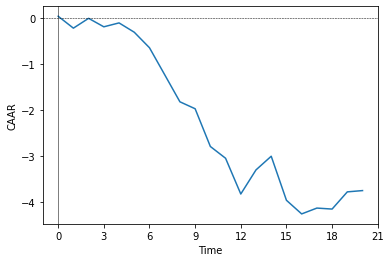

In [ ]:
owner_risk.plot(CI=False)
plt.xlabel('Time')
plt.ylabel('CAAR')
plt.show()

Multiple 사건연구 (90일)

In [ ]:
es.Single.import_returns('Group.csv') 
lt_owner_risk = es.Multiple.from_csv(
    path = 'owner_risk_list.csv', 
    event_study_model = es.Single.market_model, 
    event_window = (-0,+90), 
    estimation_size = (200), 
    buffer_size =(90), 
    date_format = '%Y-%m-%d',
    ignore_errors = True
)

In [ ]:
pd.set_option('display.max_row', 100) # 결과가 표시되는 갯수를 조절(생략 방지)
lt_owner_risk.results(decimals=[3,5,3,5,2,3])

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
0,0.028,0.4002,0.028,0.40020,0.07,0.472
1,-0.299,0.4002,-0.271,0.56597,-0.48,0.316
2,0.180,0.4002,-0.09,0.69317,-0.13,0.448
3,-0.074,0.4002,-0.164,0.80041,-0.20,0.419
4,0.030,0.4002,-0.134,0.89488,-0.15,0.441
5,-0.263,0.4002,-0.397,0.98029,-0.40,0.343
6,-0.390,0.4002,-0.787,1.05884,-0.74,0.229
7,-0.633,0.4002,-1.42,1.13195,-1.25,0.105
8,-0.627,0.4002,-2.047 **,1.20061,-1.70,0.044
9,-0.279,0.4002,-2.325 **,1.26555,-1.84,0.033


**<90거래일의 누적 평균 비정상 수익률 t-test 결과>**

분석 결과 90거래일의 t-value는 –0.56으로 통계적으로 유의미하지 않은 결과가 관찰됨

8거래일부터 52거래일까지 대체로 10% 수준에서 유의한 결과를 확인

52거래일 이후의 결과는 통계적으로 유의미하지 않기 때문에 장기적인 영향을 판단하는 것은 어렵다고 볼 수 있음

결과를 종합해보면 기업의 오너리스크는 기업가치에 단기적으로 부정적인 영향을 미친다고 할 수 있음

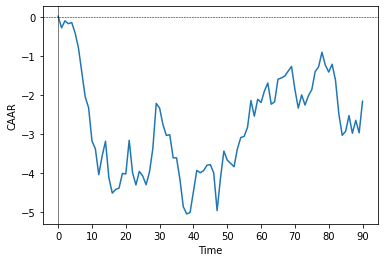

In [ ]:
lt_owner_risk.plot(CI=False)
plt.xlabel('Time')
plt.ylabel('CAAR')
plt.show()

# 추가분석 - 개별 기업의 검색량 상승이 기업가치에 미치는 영향

## (네이버 API를 사용한 개별 기업 검색어 트렌드 크롤링 툴 활용) 
**https://brunch.co.kr/@sukhyun9673/13**

**https://github.com/naver/naver-openapi-guide/blob/master/sample/python/APIExamDatalabTrend.py**

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import numpy as np
import re
import json

네이버 통합 검색어 트렌드 API 적용 가이드를 따라 코드를 작성

In [ ]:
client_id = '' # 애플리케이션 등록시 발급 받은 값 입력
client_secret = '' # 애플리케이션 등록시 발급 받은 값 입력
# 코드파일이 피어리뷰에 포함될 경우 개인 키 값이 노출될 우려가 있어 삭제하였습니다. 
# 교수님께서 원활한 코드 진행을 위해 필요하실 수 있어 별도의 텍스트 파일에 키 값을 적어놓았습니다.


url = 'https://openapi.naver.com/v1/datalab/search';

body = "{\"startDate\":\"2016-01-01\",\"endDate\":\"2020-11-30\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"삼성전자\",\"keywords\":[\"삼성전자\",\"삼성\",\"삼전\"]}],\"device\": \"\",\"ages\":[\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"gender\":\"\"}";
# body 부분에는 json 데이터 형식으로 여러가지 파라미터를 설정(검색기간, 검색기간 시간단위, 주제어와 검색어 설정, 모바일/PC 검색, 성별, 나이)

requested = urllib.request.Request(url)
requested.add_header('X-Naver-Client-Id',client_id)
requested.add_header('X-Naver-Client-Secret',client_secret)
requested.add_header('Content-Type','apllication/json')


response = urllib.request.urlopen(requested, data=body.encode('utf-8'))

rescode = response.getcode()

if (rescode == 200):
    response_body = response.read()
    scraped = response_body.decode('utf-8')
else:
    print('Error Code:' + rescode)
    
result = json.loads(scraped)

In [ ]:
result

{'endDate': '2020-11-30',
 'results': [{'data': [{'period': '2016-01-01', 'ratio': 0.64551},
    {'period': '2016-01-02', 'ratio': 0.72726},
    {'period': '2016-01-03', 'ratio': 0.75762},
    {'period': '2016-01-04', 'ratio': 2.10939},
    {'period': '2016-01-05', 'ratio': 1.84218},
    {'period': '2016-01-06', 'ratio': 1.86379},
    {'period': '2016-01-07', 'ratio': 1.98061},
    {'period': '2016-01-08', 'ratio': 2.44257},
    {'period': '2016-01-09', 'ratio': 0.87724},
    {'period': '2016-01-10', 'ratio': 0.80502},
    {'period': '2016-01-11', 'ratio': 1.99984},
    {'period': '2016-01-12', 'ratio': 1.92583},
    {'period': '2016-01-13', 'ratio': 1.64237},
    {'period': '2016-01-14', 'ratio': 1.84528},
    {'period': '2016-01-15', 'ratio': 1.57884},
    {'period': '2016-01-16', 'ratio': 0.85997},
    {'period': '2016-01-17', 'ratio': 0.78198},
    {'period': '2016-01-18', 'ratio': 1.85998},
    {'period': '2016-01-19', 'ratio': 1.7855},
    {'period': '2016-01-20', 'ratio': 1.9548

json 데이터 형식으로 나온 결과를 데이터프레임으로 전환

In [ ]:
from datetime import datetime #datetime의 datetime 모델을 사용해야 쓸 수 있는 datetime.strptime
data = result['results'][0]['data']
time = np.array([datetime.strptime(i['period'],'%Y-%M-%d') for i in data])
value = np.array([i['ratio']for i in data])

data = pd.DataFrame({'TIME': time,'TREND INDEX':value})

data

,TIME,TREND INDEX
0,2016-01-01 00:01:00,0.64551
1,2016-01-02 00:01:00,0.72726
2,2016-01-03 00:01:00,0.75762
3,2016-01-04 00:01:00,2.10939
4,2016-01-05 00:01:00,1.84218
...,...,...
1791,2020-01-26 00:11:00,19.58130
1792,2020-01-27 00:11:00,17.34401
1793,2020-01-28 00:11:00,5.48880
1794,2020-01-29 00:11:00,4.89336


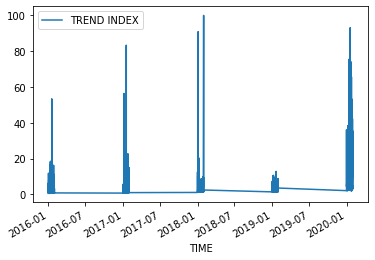

In [ ]:
data_index = data.plot(x = 'TIME', y = 'TREND INDEX')
data_index

그래프를 통해 트렌드 지수가 급등하는 시점과 수치를 대략적으로 파악하고 원하는 수치를 기준으로 특정시점을 출력

In [ ]:
Big_TREND_INDEX = data['TREND INDEX'] > 50
big_data = data[Big_TREND_INDEX]
big_data

,TIME,TREND INDEX
230,2016-01-18 00:08:00,53.40251
371,2017-01-06 00:01:00,56.38849
413,2017-01-17 00:02:00,83.35151
761,2018-01-31 00:01:00,100.00000
854,2018-01-04 00:05:00,90.91571
1533,2020-01-13 00:03:00,75.47062
1537,2020-01-17 00:03:00,55.44957
1538,2020-01-18 00:03:00,55.36395
1539,2020-01-19 00:03:00,93.12852
1540,2020-01-20 00:03:00,72.59722


출력한 데이터를 eventstudy 모듈에서 읽을 수 있게 처리

In [ ]:
삼전 = pd.DataFrame(
                {'security_ticker' : [],
                 'market_ticker' : []} 
                )

삼전 = pd.concat([삼전,big_data],ignore_index=True)
삼전.rename(columns={'TIME':'event_date'}, inplace = True)
삼전['market_ticker'] = '코스피'
삼전['security_ticker'] = '삼성전자'
삼전['event_date']= 삼전['event_date'].dt.date
삼전=삼전.astype({'event_date':'datetime64'})

In [ ]:
삼전

,security_ticker,market_ticker,event_date,TREND INDEX
0,삼성전자,코스피,2016-01-18,53.40251
1,삼성전자,코스피,2017-01-06,56.38849
2,삼성전자,코스피,2017-01-17,83.35151
3,삼성전자,코스피,2018-01-31,100.00000
4,삼성전자,코스피,2018-01-04,90.91571
5,삼성전자,코스피,2020-01-13,75.47062
6,삼성전자,코스피,2020-01-17,55.44957
7,삼성전자,코스피,2020-01-18,55.36395
8,삼성전자,코스피,2020-01-19,93.12852
9,삼성전자,코스피,2020-01-20,72.59722


데이터의 event_date가 며칠 간격으로 겹치기 때문에 사건연구의 정확성을 높이기 위해 월 중 최고일만을 분리

In [ ]:
삼전=삼전.loc[[0,2,3,8],:]
삼전

,security_ticker,market_ticker,event_date,TREND INDEX
0,삼성전자,코스피,2016-01-18,53.40251
2,삼성전자,코스피,2017-01-17,83.35151
3,삼성전자,코스피,2018-01-31,100.00000
8,삼성전자,코스피,2020-01-19,93.12852


eventstudy 모듈에서 읽어올 수 있게 처리한 데이터프레임을 CSV로 저장

In [ ]:
삼전.to_csv('삼전.csv')

사건연구에 사용할 개별 종목(삼성전자)과 주가 지수(코스피) 수익률을 하나의 데이터프레임으로 합치기

In [ ]:
코스피=index_returns_get('20150131','20201130','1001')
samsung=stock_returns_get('20150131','20201130','005930')

trend_stock_test=pd.concat([코스피,samsung],axis=1)

trend_stock_test.index.name = 'date'
trend_stock_test

,코스피,삼성전자
date,,
2015-02-02,NaN,NaN
2015-02-03,-0.036872,-0.146199
2015-02-04,0.554827,-0.512445
2015-02-05,-0.506931,-0.073584
2015-02-06,0.137236,1.030928
...,...,...
2020-11-24,0.582881,0.296296
2020-11-25,-0.619614,-1.624815
2020-11-26,0.936753,2.102102


In [ ]:
trend_stock_test.to_csv('trend_stock_test.csv')

**Multiple 사건연구 (20일)**

In [ ]:
es.Single.import_returns('trend_stock_test.csv')

test = es.Multiple.from_csv(
    path = '삼전.csv', 
    event_study_model = es.Single.market_model,
    event_window = (-0,+20),
    estimation_size = (180),
    date_format = '%Y-%m-%d',
    ignore_errors = True
)

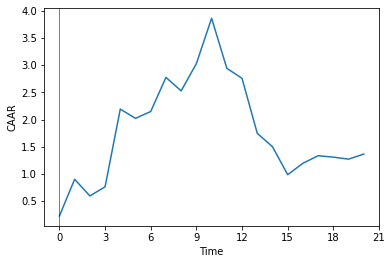

In [ ]:
test.plot(CI=False)
plt.xlabel('Time')
plt.ylabel('CAAR')
plt.show()

In [ ]:
test.results(decimals=[3,5,3,5,2,3])

,AAR,Std. E. AAR,CAAR,Std. E. CAAR,T-stat,P-value
0,0.223,0.63525,0.223,0.63525,0.35,0.363
1,0.676,0.63525,0.899,0.89838,1.00,0.159
2,-0.308,0.63525,0.591,1.10028,0.54,0.296
3,0.168,0.63525,0.76,1.27050,0.60,0.275
4,1.432,0.63525,2.192 *,1.42046,1.54,0.062
5,-0.171,0.63525,2.021 *,1.55604,1.30,0.097
6,0.127,0.63525,2.148,1.68071,1.28,0.101
7,0.629,0.63525,2.777 *,1.79676,1.55,0.061
8,-0.249,0.63525,2.528 *,1.90575,1.33,0.093
9,0.503,0.63525,3.031 *,2.00883,1.51,0.066


**<20거래일의 누적 평균 비정상 수익률 t-test 결과>**

분석 결과 20거래일의 t-value는 0.47로 통계적으로 유의미하지 않은 결과가 나왔다.

통계적으로 유의미한 결과를 보여준 기간은 4거래일부터 11거래일까지로(6거래일 제외) 대체로 10% 수준에서 유의한 결과가 나왔다.

이러한 결과를 해석해보면 삼성전자의 검색량이 평소보다 급등하는 사건은 삼성전자의 기업가치에 단기적으로 긍정적인 영향을 미친다고 볼 수 있다.

# ==========================================

## CHAPTER Ⅱ 오너리스크 외(정량변수) 주가에 영향을 미치는 변수

**국민주식이라 불리는 삼성전자. 개인투자자들이 가장 많이 들고 있는 주식으로 유명하다. CHAPTER 1은 오너리스크가 주가에 실제로 부정적인 영향을 미치는 것으로 결론을 내었다. 이 분석이 맞다면 일반인들은 오너리스크가 발생하면 주가의 하락을 예견하고 주식을 파는 전략을 취할 수 있다. 그렇다면 오너리스크 외에 개인투자자들이 쉽게 얻을 수 있는 정보들 중 주가에 지대한 영향을 미치는 변수가 어떤 것들이 있는지 알아본다. 그리하여 개인 투자자들이 유심히 관찰할 변수들을 추릴 수 있다.** 

**독립변수: 재무제표에서 사람들이 많이 보는 요소와 /거시경제 지표 / 실적속보 / 원달러 환율 이다**

**종속변수 : 삼성전자의 월간수정주가**

**추가적으로 S&P500 / NASDAQ / DJI / VIX(변동성지수) 대표적인 날마다 발표되는 미국의 지수들도 넣어보았다**

**--일단은 모듈들을 가져오고--**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

**<엑셀에서 Y변수(종속변수)를 먼저 가져온다.>**

In [ ]:
from google.colab import files
myfile = files.upload()

Saving Reg.xlsx to Reg (2).xlsx


## **종속변수**

**< Y변수들과 DATE를  먼저 불러온다. 이유는 밑에서 설명>**

In [ ]:
df_ss = pd.read_excel('Reg.xlsx',
                          sheet_name = 'SS_data',
                           header = 25)
df_ss

,2009-12-30 00:00:00,10149930000,17818740000,9839329000,8235140000,7780007000,3753199000,3037661000,392484.24,37531.99,30376.61,2.8,1.5,31.26,66.44,1170.9,15496,7015783,12.03,0.0092
0,2010-01-29,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5,16402,7570021,-1.88,0.0229
1,2010-02-26,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4,15233,6030600,-5.10,0.0167
2,2010-03-31,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,346380.70,40352.95,39937.70,2.20,1.50,33.66,77.95,1130.8,15854,6036773,9.95,0.0126
3,2010-04-30,8.629948e+09,1.967020e+10,1.382486e+10,9.750553e+09,8.049470e+09,4.704875e+09,4.276915e+09,346380.70,40352.95,39937.70,2.20,1.50,33.75,80.38,1115.5,16883,7310197,3.79,0.0159
4,2010-05-31,8.629948e+09,1.967020e+10,1.382486e+10,9.750553e+09,8.049470e+09,4.704875e+09,4.276915e+09,346380.70,40352.95,39937.70,2.20,1.50,35.62,84.22,1200.2,15744,7524343,-8.60,0.0199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2020-08-31,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1,56980,401697954,-6.74,0.0145
128,2020-09-29,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,669641.60,123532.38,93606.93,1.41,0.25,242.76,173.84,1173.5,58176,426302298,8.43,0.0164
129,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59737,327557687,-2.75,0.0114
130,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63419,496431342,17.84,0.0203


**<Reg 엑셀의 ss_date 시트에서 17번째 행부터 수정주가/ 거래량 /수익률 /변동성이다. 프로젝트를 진행할때 여러 종속변수들을 사용해서 불러올때 저렇게 불러올수 밖에 없었음>**

In [ ]:
df_ss_y = df_ss.drop(df_ss.columns[1:16],axis = 1)
df_ss_y

,2009-12-30 00:00:00,15496,7015783,12.03,0.0092
0,2010-01-29,16402,7570021,-1.88,0.0229
1,2010-02-26,15233,6030600,-5.10,0.0167
2,2010-03-31,15854,6036773,9.95,0.0126
3,2010-04-30,16883,7310197,3.79,0.0159
4,2010-05-31,15744,7524343,-8.60,0.0199
...,...,...,...,...,...
127,2020-08-31,56980,401697954,-6.74,0.0145
128,2020-09-29,58176,426302298,8.43,0.0164
129,2020-10-30,59737,327557687,-2.75,0.0114
130,2020-11-30,63419,496431342,17.84,0.0203


**<날짜와 수정주가만 빼고 나머지 종속변수들은 지운다>**

In [ ]:
df_ss_y.drop(df_ss_y.columns[2:],axis = 1,inplace = True)

**<이전과 같이 132개 행이며 2010-1월말부터 2020년 현재까지의 주가를 나타낸다.>**

In [ ]:
df_ss_y

,2009-12-30 00:00:00,15496
0,2010-01-29,16402
1,2010-02-26,15233
2,2010-03-31,15854
3,2010-04-30,16883
4,2010-05-31,15744
...,...,...
127,2020-08-31,56980
128,2020-09-29,58176
129,2020-10-30,59737
130,2020-11-30,63419


**<날짜를 인덱스로 지정해준다. 이것이 Y변수를 먼저 불러오는 이유이다. 왜냐하면 지수들을 불러왔는데 resample('M')으로 불러왔을 시에 왜인지 모르게 어떤 방법을 써도 중간중간에 사라진 MONTH가 존재했다. 그래서 전략을 바꿔 일별로 그냥 불러오고 수정주가의 날짜와 일치시키고 하나의 데이터 프레임으로 합치기로 함>**

**<날짜인덱스지정>**

In [ ]:
df_ss_y.rename(columns={df_ss_y.columns[0]:'date',df_ss_y.columns[1]: 'rv_stock_price'},inplace = True)

In [ ]:
df_ss_y = df_ss_y.set_index('date')

## **독립변수 PART1**

**<첫 번째로 불러올 독립변수는 s&p500지수 / 나스닥지수 / 다운존스지수/ 변동성지수(vix)>**

**<finance-datereader 모듈로 지수들의 일간 데이터를 불러옵니다>**

In [ ]:
pip install finance-datareader

**<2010년 1월 3일부터 현재까지의 지수들(points)을 가지고 온다>**

In [ ]:
import FinanceDataReader as fdr

df_sp500 = fdr.DataReader('US500','2010-01-03')
df_dji = fdr.DataReader('DJI','2010-01-03')
df_nasdaq = fdr.DataReader('IXIC','2010-01-03')
df_vix = fdr.DataReader('VIX','2010-01-03')

**<우리는 이 4개 지수의 종가를 가져와서 하나의 데이터 프레임으로 만들 것이므로 열 이름을 바꿔준다.>**

In [ ]:
df_sp500.rename(columns = {'Close':'SP500'},inplace = True)

In [ ]:
df_sp500_=df_sp500.dropna(axis = 0)

In [ ]:
DF_SP500=df_sp500_['SP500']

**<2010년 1월 3일부터 매일의 s&p500지수를 종가기준(close)으로 불러오기 완성.>**

In [ ]:
DF_SP500

Date
2010-01-04    1132.99
2010-01-05    1136.52
2010-01-06    1137.14
2010-01-07    1141.69
2010-01-08    1144.98
               ...   
2020-12-01    3662.45
2020-12-02    3669.01
2020-12-03    3666.72
2020-12-04    3699.12
2020-12-07    3691.96
Name: SP500, Length: 2752, dtype: float64

**<마찬가지로 다우존스도 같은 과정을 반복한다. 나머지 지수들도 반복 작업 불러온다.>**

In [ ]:
df_dji.rename(columns = {'Close':'DJI'},inplace = True)

In [ ]:
df_dji_=df_dji.dropna(axis = 0)

In [ ]:
DF_DJI=df_dji_['DJI']

In [ ]:
DF_DJI

Date
2010-01-04    10583.96
2010-01-05    10572.02
2010-01-06    10573.68
2010-01-07    10606.86
2010-01-08    10618.19
                ...   
2020-12-01    29823.92
2020-12-02    29883.79
2020-12-03    29969.52
2020-12-04    30218.26
2020-12-07    30069.79
Name: DJI, Length: 2751, dtype: float64

In [ ]:
df_nasdaq.rename(columns = {'Close':'NASDAQ'},inplace = True)

In [ ]:
df_nasdaq_=df_nasdaq.dropna(axis = 0)

In [ ]:
DF_NASDAQ=df_nasdaq_['NASDAQ']

In [ ]:
DF_NASDAQ

Date
2010-01-04     2308.42
2010-01-05     2308.71
2010-01-06     2301.09
2010-01-07     2300.05
2010-01-08     2317.17
                ...   
2020-12-01    12355.11
2020-12-02    12349.37
2020-12-03    12377.18
2020-12-04    12464.23
2020-12-07    12519.95
Name: NASDAQ, Length: 2752, dtype: float64

In [ ]:
df_vix.rename(columns = {'Close':'VIX'},inplace = True)

In [ ]:
df_vix_=df_vix.dropna(axis = 0)

In [ ]:
DF_VIX=df_vix_['VIX']

In [ ]:
DF_VIX

Date
2010-01-04    20.04
2010-01-05    19.35
2010-01-06    19.16
2010-01-07    19.06
2010-01-08    18.13
              ...  
2020-12-02    21.17
2020-12-03    21.28
2020-12-04    20.79
2020-12-07    21.30
2020-12-08    21.94
Name: VIX, Length: 2756, dtype: float64

**<4개의 지수들을 하나의 데이터프레임으로 합쳐준다>**

In [ ]:
import pandas as pd
DF_UI = pd.concat([DF_SP500,DF_DJI,DF_NASDAQ,DF_VIX],axis = 1)

In [ ]:
DF_UI

,SP500,DJI,NASDAQ,VIX
Date,,,,
2010-01-04,1132.99,10583.96,2308.42,20.04
2010-01-05,1136.52,10572.02,2308.71,19.35
2010-01-06,1137.14,10573.68,2301.09,19.16
2010-01-07,1141.69,10606.86,2300.05,19.06
2010-01-08,1144.98,10618.19,2317.17,18.13
...,...,...,...,...
2020-12-02,3669.01,29883.79,12349.37,21.17
2020-12-03,3666.72,29969.52,12377.18,21.28
2020-12-04,3699.12,30218.26,12464.23,20.79


**<종속변수(df_ss_y)와 독립변수_part_1(DF_UI)를 합쳐준다>**

In [ ]:
DF_ALL_=pd.concat([DF_UI,df_ss_y],axis = 1)

**<여기서 pd.concat으로 이전의 수정주가와 DF_UI를 합쳐서 dropna를 하면 수정주가의 행의 수만큼 132개의 행이 나와야하는데 아래에서 확인하듯이 129개의 행이 나와버린다. 이는 즉 수정주의  날짜에 미국 지수들중 비어있는 값들이 있었다는 것이다. 확인을 위해 iloc으로 뒤져본 결과 2013년 12월 31일에 결측행이 존재했고 엑셀 파일로 저장하여 직접 오류를 수정하기로 하였다>**

In [ ]:
DF_ALL_.dropna(axis = 0)

,SP500,DJI,NASDAQ,VIX,rv_stock_price
2010-01-29,1073.87,10067.33,2147.35,24.62,16402.0
2010-02-26,1104.49,10325.26,2238.26,19.50,15233.0
2010-03-31,1169.43,10856.63,2397.96,17.59,15854.0
2010-04-30,1186.69,11008.61,2461.19,22.05,16883.0
2010-06-30,1030.71,9774.02,2109.24,34.54,15953.0
...,...,...,...,...,...
2020-08-31,3500.31,28430.05,11775.46,26.41,56980.0
2020-09-29,3335.47,27452.66,11085.25,26.27,58176.0
2020-10-30,3269.96,26501.60,10911.59,38.02,59737.0
2020-11-30,3621.63,29638.64,12198.74,20.57,63419.0


In [ ]:
# DF_ALL_before=pd.concat([DF_UI,df_ss_y],axis =1).to_excel(excel_writer='DF_ALL_MOD.xlsx')

**<확인해본결과 나의 예상대로 수정주가의 날에 지수들의 값이 비어있는 것이 3개가 존재했다. 한국장이 열리는 날에 미국의 장이 열리지 않는 날도 존재하기에 발생하는 오류였던 것이다. 3개의 결측행들을 previous 값으로 직접 바꿔주고 다시 엑셀을 불러왔다. 이미 주피터에서 오류를 발견하고 전부 수정했기 때문에 굳이 COLAB에서 다시 오류값을 불러오고 엑셀저장하고 수정할 필요가 없다 생각하여 그냥 수정된 엑셀파일을 올린다>**

In [ ]:
from google.colab import files
myfile = files.upload()

Saving DF_ALL_MOD.xlsx to DF_ALL_MOD (3).xlsx


In [ ]:
DF_ALL = pd.read_excel('DF_ALL_MOD.xlsx',
                          sheet_name = 'Sheet1',
                           header=0)
DF_ALL

,Unnamed: 0,SP500,DJI,NASDAQ,VIX,rv_stock_price
0,2010-01-04,1132.99,10583.96,2308.42,20.04,NaN
1,2010-01-05,1136.52,10572.02,2308.71,19.35,NaN
2,2010-01-06,1137.14,10573.68,2301.09,19.16,NaN
3,2010-01-07,1141.69,10606.86,2300.05,19.06,NaN
4,2010-01-08,1144.98,10618.19,2317.17,18.13,NaN
...,...,...,...,...,...,...
2754,2020-12-02,3669.01,29883.79,12349.37,21.17,NaN
2755,2020-12-03,3666.72,29969.52,12377.18,21.28,NaN
2756,2020-12-04,3699.12,30218.26,12464.23,20.79,69625.0
2757,2020-12-07,3691.96,30069.79,12519.95,21.30,NaN


In [ ]:
DF_ALL=DF_ALL.dropna(axis = 0) 
DF_ALL

,Unnamed: 0,SP500,DJI,NASDAQ,VIX,rv_stock_price
18,2010-01-29,1073.87,10067.33,2147.35,24.62,16402.0
37,2010-02-26,1104.49,10325.26,2238.26,19.50,15233.0
60,2010-03-31,1169.43,10856.63,2397.96,17.59,15854.0
81,2010-04-30,1186.69,11008.61,2461.19,22.05,16883.0
102,2010-05-31,1089.41,10136.63,2257.04,32.07,15744.0
...,...,...,...,...,...,...
2688,2020-08-31,3500.31,28430.05,11775.46,26.41,56980.0
2708,2020-09-29,3335.47,27452.66,11085.25,26.27,58176.0
2731,2020-10-30,3269.96,26501.60,10911.59,38.02,59737.0
2752,2020-11-30,3621.63,29638.64,12198.74,20.57,63419.0


**<132개의 행이 나왔다.올바르게 나왔음을 알 수 있다>**

In [ ]:
DF_ALL

,Unnamed: 0,SP500,DJI,NASDAQ,VIX,rv_stock_price
18,2010-01-29,1073.87,10067.33,2147.35,24.62,16402.0
37,2010-02-26,1104.49,10325.26,2238.26,19.50,15233.0
60,2010-03-31,1169.43,10856.63,2397.96,17.59,15854.0
81,2010-04-30,1186.69,11008.61,2461.19,22.05,16883.0
102,2010-05-31,1089.41,10136.63,2257.04,32.07,15744.0
...,...,...,...,...,...,...
2688,2020-08-31,3500.31,28430.05,11775.46,26.41,56980.0
2708,2020-09-29,3335.47,27452.66,11085.25,26.27,58176.0
2731,2020-10-30,3269.96,26501.60,10911.59,38.02,59737.0
2752,2020-11-30,3621.63,29638.64,12198.74,20.57,63419.0


**<unnamed:0 열을 보면 월말에 맞는 데이터가 나왔고 132개의 행까지 정확히 맞는다. 이제 날짜 데이터는 회귀분석을 위해 더 이상 필요하지 않다. 깔끔하게 지워준다>**

In [ ]:
DF_ALL = DF_ALL.drop(DF_ALL.columns[0],axis = 1)
DF_ALL

,SP500,DJI,NASDAQ,VIX,rv_stock_price
18,1073.87,10067.33,2147.35,24.62,16402.0
37,1104.49,10325.26,2238.26,19.50,15233.0
60,1169.43,10856.63,2397.96,17.59,15854.0
81,1186.69,11008.61,2461.19,22.05,16883.0
102,1089.41,10136.63,2257.04,32.07,15744.0
...,...,...,...,...,...
2688,3500.31,28430.05,11775.46,26.41,56980.0
2708,3335.47,27452.66,11085.25,26.27,58176.0
2731,3269.96,26501.60,10911.59,38.02,59737.0
2752,3621.63,29638.64,12198.74,20.57,63419.0


**<엉망인 인덱스를 재정렬해주고 열로 넘어온 이전 인덱스를 지워준다>**

In [ ]:
DF_ALL =DF_ALL.reset_index()
DF_ALL

,index,SP500,DJI,NASDAQ,VIX,rv_stock_price
0,18,1073.87,10067.33,2147.35,24.62,16402.0
1,37,1104.49,10325.26,2238.26,19.50,15233.0
2,60,1169.43,10856.63,2397.96,17.59,15854.0
3,81,1186.69,11008.61,2461.19,22.05,16883.0
4,102,1089.41,10136.63,2257.04,32.07,15744.0
...,...,...,...,...,...,...
127,2688,3500.31,28430.05,11775.46,26.41,56980.0
128,2708,3335.47,27452.66,11085.25,26.27,58176.0
129,2731,3269.96,26501.60,10911.59,38.02,59737.0
130,2752,3621.63,29638.64,12198.74,20.57,63419.0


In [ ]:
DF_ALL.drop(DF_ALL.columns[0],axis =1,inplace = True)
DF_ALL

,SP500,DJI,NASDAQ,VIX,rv_stock_price
0,1073.87,10067.33,2147.35,24.62,16402.0
1,1104.49,10325.26,2238.26,19.50,15233.0
2,1169.43,10856.63,2397.96,17.59,15854.0
3,1186.69,11008.61,2461.19,22.05,16883.0
4,1089.41,10136.63,2257.04,32.07,15744.0
...,...,...,...,...,...
127,3500.31,28430.05,11775.46,26.41,56980.0
128,3335.47,27452.66,11085.25,26.27,58176.0
129,3269.96,26501.60,10911.59,38.02,59737.0
130,3621.63,29638.64,12198.74,20.57,63419.0


## **독립변수 PART2**

**<종속변수 즉, Y변수를 가져온 엑셀에 X변수도 존재하므로 Reg.xlsx 불러온다>**

In [ ]:
df_ss = pd.read_excel('Reg.xlsx',
                          sheet_name = 'SS_data',
                           header = 22)
df_ss

,2009-09-30 00:00:00,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,4175711000,3806140000,358938.08,41757.11,38061.4,2.8,1.5,30.31,61.99,1188.7,15865,10218126,5.71,0.0172
0,2009-10-30,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6,14897,11202878,-11.29,0.0238
1,2009-11-30,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4,14651,7872336,-0.41,0.0182
2,2009-12-30,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9,15496,7015783,12.03,0.0092
3,2010-01-29,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5,16402,7570021,-1.88,0.0229
4,2010-02-26,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4,15233,6030600,-5.10,0.0167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2020-08-31,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1,56980,401697954,-6.74,0.0145
131,2020-09-29,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,669641.60,123532.38,93606.93,1.41,0.25,242.76,173.84,1173.5,58176,426302298,8.43,0.0164
132,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59737,327557687,-2.75,0.0114
133,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63419,496431342,17.84,0.0203


**<이러한 의문이 들으실거다 왜 하나의 엑셀에 x변수와 y변수가 같이 있는데 따로 불러온거지? 심지어 하나의 표로 붙어있는데? 답은 이렇다. 불러오는 x변수들은 재무제표 요소들과 실적 속보, 그 다음 발표되는 경제지표와 반도체 수출지표들이다 이러한 지표들은 집계후 한달뒤 혹은 두달뒤에 발표가 된다. 4분기실적은  3월말까지이고 다른 분기성적은 45일 이내에 공시해야 한다. 비록 45일일 지라도 삼성은 집계 후 한달안에 나오는 편이다.그래서 2009년 말의 발표된 여러 지표 변수들이 한달 뒤의 주가에 영향을 미친다고 가정하였다. 그렇게 되면서 하나의 엑셀 시트에 있어도 변수 행을 다르게 잡아야 해서 따로 불러왔다>**

In [ ]:
df_ss_x_ = df_ss.drop(df_ss.columns[16:],axis = 1)
df_ss_x_

,2009-09-30 00:00:00,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,4175711000,3806140000,358938.08,41757.11,38061.4,2.8,1.5,30.31,61.99,1188.7
0,2009-10-30,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6
1,2009-11-30,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4
2,2009-12-30,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9
3,2010-01-29,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5
4,2010-02-26,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2020-08-31,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1
131,2020-09-29,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,669641.60,123532.38,93606.93,1.41,0.25,242.76,173.84,1173.5
132,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**필요 없는 날짜 변수는 지워준다 +(예를들면 2019년 말의 실적지표들이 그 다음달 주가에 영향을 준다는 가정이다. 즉 엑셀에서 매일 발표되는 미국 주가지수들을 제외하고 x변수들은 y(수정주가지수)와 날짜가 다르다. 19년도 말 실적 데이터는 그 다음날 20년 1월 말 주가에 영향을 준다는 가정이다) +(물론 연말의 자료는 기한이 3월 말까지이기는 하지만 그것을 일일이 고려하지 못하였다)**

In [ ]:
df_ss_x = df_ss_x_.drop(df_ss.columns[0],axis = 1)
df_ss_x

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,4175711000,3806140000,358938.08,41757.11,38061.4,2.8,1.5,30.31,61.99,1188.7
0,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6
1,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4
2,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9
3,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5
4,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1
131,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,669641.60,123532.38,93606.93,1.41,0.25,242.76,173.84,1173.5
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**<불러온 독립변수 PART2들의 이름을 일일이 지정해준다.>**

**<순서대로 현금성자산 / 매출채권 / 재고자산 / 매입채무 / 단기차입금 / 영업이익 / 당기순이익 / 매출실적속보 / 영업이익실적속보 / 당기순이익 실적속보 / 한국경제성장률 / 미국경제성장률 / 반도체 수출물량지수 / 반도체 수출가격지수 / 원달러 환율 총 15개 변수>**

In [ ]:
df_ss_x.rename(columns={df_ss_x.columns[0] : 'cash_asset',
                        df_ss_x.columns[1] : 'accounts_receiv',
                        df_ss_x.columns[2] : 'inventor',
                        df_ss_x.columns[3] : 't_payables',
                        df_ss_x.columns[4] : 'st_borr',
                        df_ss_x.columns[5] : 'os',
                        df_ss_x.columns[6] : 'ni',
                        df_ss_x.columns[7] : 'report_sales',
                        df_ss_x.columns[8] : 'report_os',
                        df_ss_x.columns[9] : 'report_ni',
                        df_ss_x.columns[10] : 'eco_growth_kor',
                        df_ss_x.columns[11] : 'eco_growth_usa',
                        df_ss_x.columns[12] : 'EVI_semiconductor',
                        df_ss_x.columns[13] : 'EAI_semiconductor',
                        df_ss_x.columns[14] : 'ex_rate',},inplace =  True)
df_ss_x

,cash_asset,accounts_receiv,inventor,t_payables,st_borr,os,ni,report_sales,report_os,report_ni,eco_growth_kor,eco_growth_usa,EVI_semiconductor,EAI_semiconductor,ex_rate
0,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6
1,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4
2,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9
3,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5
4,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1
131,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,669641.60,123532.38,93606.93,1.41,0.25,242.76,173.84,1173.5
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**<y변수 와 미국 주식시장 지표들을 가진  'DF_ALL' 과 동일한 132행이다>** 

In [ ]:
df_ss_x.dropna(axis = 0,inplace = True)
df_ss_x

,cash_asset,accounts_receiv,inventor,t_payables,st_borr,os,ni,report_sales,report_os,report_ni,eco_growth_kor,eco_growth_usa,EVI_semiconductor,EAI_semiconductor,ex_rate
0,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6
1,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4
2,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9
3,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5
4,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,553251.78,64473.45,48849.26,1.41,0.25,201.17,151.54,1239.4
128,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,529661.42,81462.92,55550.83,1.41,0.25,229.78,173.60,1200.7
129,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,227.21,164.16,1191.4
130,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1


**<이제 합쳐준다>**

In [ ]:
DF_SS_TOTAL=pd.concat([DF_ALL,df_ss_x],axis=1)

In [ ]:
DF_SS_TOTAL

,SP500,DJI,NASDAQ,VIX,rv_stock_price,cash_asset,accounts_receiv,inventor,t_payables,st_borr,os,ni,report_sales,report_os,report_ni,eco_growth_kor,eco_growth_usa,EVI_semiconductor,EAI_semiconductor,ex_rate
0,1073.87,10067.33,2147.35,24.62,16402.0,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6
1,1104.49,10325.26,2238.26,19.50,15233.0,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4
2,1169.43,10856.63,2397.96,17.59,15854.0,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9
3,1186.69,11008.61,2461.19,22.05,16883.0,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5
4,1089.41,10136.63,2257.04,32.07,15744.0,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3500.31,28430.05,11775.46,26.41,56980.0,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,553251.78,64473.45,48849.26,1.41,0.25,201.17,151.54,1239.4
128,3335.47,27452.66,11085.25,26.27,58176.0,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,529661.42,81462.92,55550.83,1.41,0.25,229.78,173.60,1200.7
129,3269.96,26501.60,10911.59,38.02,59737.0,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,227.21,164.16,1191.4
130,3621.63,29638.64,12198.74,20.57,63419.0,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1


**<처음에 만들려고 했던 독립변수와 종속변수들의 data-frame이 완성되었다>**

## 회귀분석 PART

**X변수들을 설정한다 X변수들은 {S&P500지수/다우지수/나스닥지수/ 변동성지수/현금성자산 / 매출채권 / 재고자산 / 매입채무 / 단기사채 / 영업이익 / 당기순이익 / 영업이익(속보) / 당기순이익(속보) / 경제성장률(한국) / 경제성장률(미국)/ 반도체 수출물량지수 / 반도체 수출금액지수 / 원달러환율} 이상 총 19개**

In [ ]:
x_data = DF_SS_TOTAL[['SP500','DJI','NASDAQ','VIX','cash_asset','accounts_receiv','inventor','t_payables','st_borr','os','ni','report_sales','report_os','report_ni','eco_growth_kor','eco_growth_usa','EVI_semiconductor','EAI_semiconductor','ex_rate']]
x_data

,SP500,DJI,NASDAQ,VIX,cash_asset,accounts_receiv,inventor,t_payables,st_borr,os,ni,report_sales,report_os,report_ni,eco_growth_kor,eco_growth_usa,EVI_semiconductor,EAI_semiconductor,ex_rate
0,1073.87,10067.33,2147.35,24.62,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6
1,1104.49,10325.26,2238.26,19.50,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4
2,1169.43,10856.63,2397.96,17.59,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9
3,1186.69,11008.61,2461.19,22.05,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5
4,1089.41,10136.63,2257.04,32.07,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3500.31,28430.05,11775.46,26.41,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,553251.78,64473.45,48849.26,1.41,0.25,201.17,151.54,1239.4
128,3335.47,27452.66,11085.25,26.27,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,529661.42,81462.92,55550.83,1.41,0.25,229.78,173.60,1200.7
129,3269.96,26501.60,10911.59,38.02,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,227.21,164.16,1191.4
130,3621.63,29638.64,12198.74,20.57,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1


**<Y(종속변수)는 삼성전자의 수정주가>**

In [ ]:
target = DF_SS_TOTAL[['rv_stock_price']]

In [ ]:
x_data_con = sm.add_constant(x_data,has_constant = 'add')
multi_model = sm.OLS(target,x_data_con)
fitted_multi_model = multi_model.fit()

**<높은 결정 계수 그러나 높은 다중공선성, 전혀 쓸만한 모델이 아니다>**

In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rv_stock_price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           3.18e-81
Time:                        12:48:51   Log-Likelihood:                -1195.5
No. Observations:                 132   AIC:                             2431.
Df Residuals:                     112   BIC:                             2489.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.149e+04   8758.969     -1.312      0.192   -2.88e+04    5866.286
SP500               -27.5171      6.682     -4.118      0.000     -40.757     -14.277
DJI                   3.9697      0.543      7.309      0.000       2.894       5.046
NASDAQ                3.8421      1.015      3.787      0.000       1.832       5.852
VIX                  98.6833     48.824      2.021      0.046       1.944     195.422
cash_asset         1.207e-08   1.01e-07      0.120      0.905   -1.88e-07    2.12e-07
accounts_receiv    -7.58e-07   1.45e-07     -5.242      0.000   -1.04e-06   -4.71e-07
inventor          -2.395e-07   1.88e-07     -1.271      0.206   -6.13e-07    1.34e-07
t_payables         7.955e-07   2.71e-07      2.941      0.004     2.6e-07    1.33e-06
st_borr           -5.445e-08   1.62e-07     -0.336      0.737   -3.75e-07    2.67e-07
os                 1.278e-06   5.25e-07      2.436      0.016    2.39e-07    2.32e-06
ni                -6.643e-08   6.51e-07     -0.102      0.919   -1.36e-06    1.22e-06
report_sales          0.0032      0.009      0.365      0.716      -0.014       0.020
report_os            -0.1536      0.044     -3.519      0.001      -0.240      -0.067
report_ni             0.2356      0.059      4.006      0.000       0.119       0.352
eco_growth_kor      882.6279    511.553      1.725      0.087    -130.949    1896.205
eco_growth_usa      -13.7452    161.845     -0.085      0.932    -334.420     306.930
EVI_semiconductor   152.1917     20.843      7.302      0.000     110.893     193.490
EAI_semiconductor  -165.6548     22.627     -7.321      0.000    -210.488    -120.822
ex_rate               9.8613      6.151      1.603      0.112      -2.326      22.049
==============================================================================
Omnibus:                        6.888   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.490
Skew:                           0.476   Prob(JB):                       0.0390
Kurtosis:                       3.523   Cond. No.                     2.02e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**<우선 다중공선성의 문제가 먼저 보인다 이를 해결하기 위해 데이터 스케일을 거친다>**

In [ ]:
x_var_list = list(x_data)
x_var_list

['SP500',
 'DJI',
 'NASDAQ',
 'VIX',
 'cash_asset',
 'accounts_receiv',
 'inventor',
 't_payables',
 'st_borr',
 'os',
 'ni',
 'report_sales',
 'report_os',
 'report_ni',
 'eco_growth_kor',
 'eco_growth_usa',
 'EVI_semiconductor',
 'EAI_semiconductor',
 'ex_rate']

In [ ]:
x_var_list = ["scale({})".format(name) for name in x_var_list]

In [ ]:
multi_model = sm.OLS.from_formula("rv_stock_price ~ " + "+".join(x_var_list),data = DF_SS_TOTAL)
fitted_multi_model = multi_model.fit()

In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rv_stock_price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           3.18e-81
Time:                        12:49:00   Log-Likelihood:                -1195.5
No. Observations:                 132   AIC:                             2431.
Df Residuals:                     112   BIC:                             2489.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.319e+04    196.129    169.216      0.000    3.28e+04    3.36e+04
scale(SP500)             -1.855e+04   4505.650     -4.118      0.000   -2.75e+04   -9626.117
scale(DJI)                2.227e+04   3047.396      7.309      0.000    1.62e+04    2.83e+04
scale(NASDAQ)             9352.4397   2469.613      3.787      0.000    4459.218    1.42e+04
scale(VIX)                 691.8384    342.292      2.021      0.046      13.630    1370.047
scale(cash_asset)           92.6152    773.607      0.120      0.905   -1440.187    1625.418
scale(accounts_receiv)   -4917.0047    938.056     -5.242      0.000   -6775.643   -3058.366
scale(inventor)          -1383.8494   1088.713     -1.271      0.206   -3540.996     773.297
scale(t_payables)         1090.4906    370.816      2.941      0.004     355.765    1825.216
scale(st_borr)            -156.0801    464.402     -0.336      0.737   -1076.234     764.074
scale(os)                 4618.9707   1895.891      2.436      0.016     862.506    8375.435
scale(ni)                 -174.6711   1710.500     -0.102      0.919   -3563.808    3214.466
scale(report_sales)        257.1108    703.794      0.365      0.716   -1137.367    1651.589
scale(report_os)         -5530.1811   1571.324     -3.519      0.001   -8643.559   -2416.803
scale(report_ni)          6177.3587   1542.132      4.006      0.000    3121.821    9232.896
scale(eco_growth_kor)      694.4501    402.489      1.725      0.087    -103.030    1491.931
scale(eco_growth_usa)      -20.2461    238.391     -0.085      0.932    -492.588     452.096
scale(EVI_semiconductor)  8726.1512   1195.091      7.302      0.000    6358.231    1.11e+04
scale(EAI_semiconductor) -6919.7888    945.191     -7.321      0.000   -8792.564   -5047.014
scale(ex_rate)             486.6054    303.519      1.603      0.112    -114.779    1087.990
==============================================================================
Omnibus:                        6.888   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.490
Skew:                           0.476   Prob(JB):                       0.0390
Kurtosis:                       3.523   Cond. No.                         94.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_data

,SP500,DJI,NASDAQ,VIX,cash_asset,accounts_receiv,inventor,t_payables,st_borr,os,ni,report_sales,report_os,report_ni,eco_growth_kor,eco_growth_usa,EVI_semiconductor,EAI_semiconductor,ex_rate
0,1073.87,10067.33,2147.35,24.62,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6
1,1104.49,10325.26,2238.26,19.50,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4
2,1169.43,10856.63,2397.96,17.59,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9
3,1186.69,11008.61,2461.19,22.05,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5
4,1089.41,10136.63,2257.04,32.07,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3500.31,28430.05,11775.46,26.41,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,553251.78,64473.45,48849.26,1.41,0.25,201.17,151.54,1239.4
128,3335.47,27452.66,11085.25,26.27,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,529661.42,81462.92,55550.83,1.41,0.25,229.78,173.60,1200.7
129,3269.96,26501.60,10911.59,38.02,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,227.21,164.16,1191.4
130,3621.63,29638.64,12198.74,20.57,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1


**<독립변수(X)들의 상관관계를 한눈에 알아보기 쉽게 히트맵으로 그려보자. 사실 히트맵을 보기위해 변수명을 일일이 영어로 지정하였다. 영어가 아니면 히트맵을 그릴때 변수명이 보이지도 않고 보기도 힘들다>**

**<히트맵을 통해 독립변수들간의 상관계수들을 한눈에 보기 쉽다 이후에 VIF 테스트와 함께 활용하여 변수들을 지워나갈때 참고지표로 사용한다>**

In [ ]:
x_data.rename(columns={x_data.columns[0] : 'scale(SP500)',
                      x_data.columns[1] : 'scale(DJI)',
                      x_data.columns[2] : 'scale(NASDAQ)',
                      x_data.columns[3] : 'scale(VIX)',
                      x_data.columns[4] : 'scale(cash_asset)',
                      x_data.columns[5] : 'scal(accounts_receiv)',
                      x_data.columns[6] : 'scale(inventor)',
                      x_data.columns[7] : 'scale(t_payables)',
                      x_data.columns[8] : 'scale(st_borr)',
                      x_data.columns[9] : 'scale(os)',
                      x_data.columns[10] : 'scale(ni)',
                      x_data.columns[11] : 'scale(report_sales)',
                      x_data.columns[12] : 'scale(report_os)',
                      x_data.columns[13] : 'scale(report_ni)',
                      x_data.columns[14] : 'scale(eco_growth_kor)',
                       x_data.columns[15] : 'scale(eco_growth_usa)',
                      x_data.columns[16] : 'scale(EVI_semiconductor)',
                       x_data.columns[17] : 'scale(EAI_semiconductor)',
                       x_data.columns[18] : 'scale(ex_rate)',},inplace =  True)
x_data


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,scale(SP500),scale(DJI),scale(NASDAQ),scale(VIX),scale(cash_asset),scal(accounts_receiv),scale(inventor),scale(t_payables),scale(st_borr),scale(os),scale(ni),scale(report_sales),scale(report_os),scale(report_ni),scale(eco_growth_kor),scale(eco_growth_usa),scale(EVI_semiconductor),scale(EAI_semiconductor),scale(ex_rate)
0,1073.87,10067.33,2147.35,24.62,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,30.31,61.99,1200.6
1,1104.49,10325.26,2238.26,19.50,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,358938.08,41757.11,38061.40,2.80,1.50,31.26,66.44,1167.4
2,1169.43,10856.63,2397.96,17.59,1.014993e+10,1.781874e+10,9.839329e+09,8.235140e+09,7.780007e+09,3.753199e+09,3.037661e+09,392484.24,37531.99,30376.61,2.80,1.50,31.26,66.44,1170.9
3,1186.69,11008.61,2461.19,22.05,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,31.24,66.99,1156.5
4,1089.41,10136.63,2257.04,32.07,9.225243e+09,1.702088e+10,1.171618e+10,1.045613e+10,6.741465e+09,4.035295e+09,3.993770e+09,392484.24,37531.99,30376.61,0.40,4.50,27.84,64.04,1158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3500.31,28430.05,11775.46,26.41,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,553251.78,64473.45,48849.26,1.41,0.25,201.17,151.54,1239.4
128,3335.47,27452.66,11085.25,26.27,3.610961e+10,3.298976e+10,2.964553e+10,9.545977e+09,1.277635e+10,8.146292e+09,5.555083e+09,529661.42,81462.92,55550.83,1.41,0.25,229.78,173.60,1200.7
129,3269.96,26501.60,10911.59,38.02,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,227.21,164.16,1191.4
130,3621.63,29638.64,12198.74,20.57,2.656610e+10,4.037987e+10,3.244286e+10,1.168818e+10,1.585625e+10,1.235324e+10,9.360693e+09,529661.42,81462.92,55550.83,1.41,0.25,242.76,173.84,1185.1


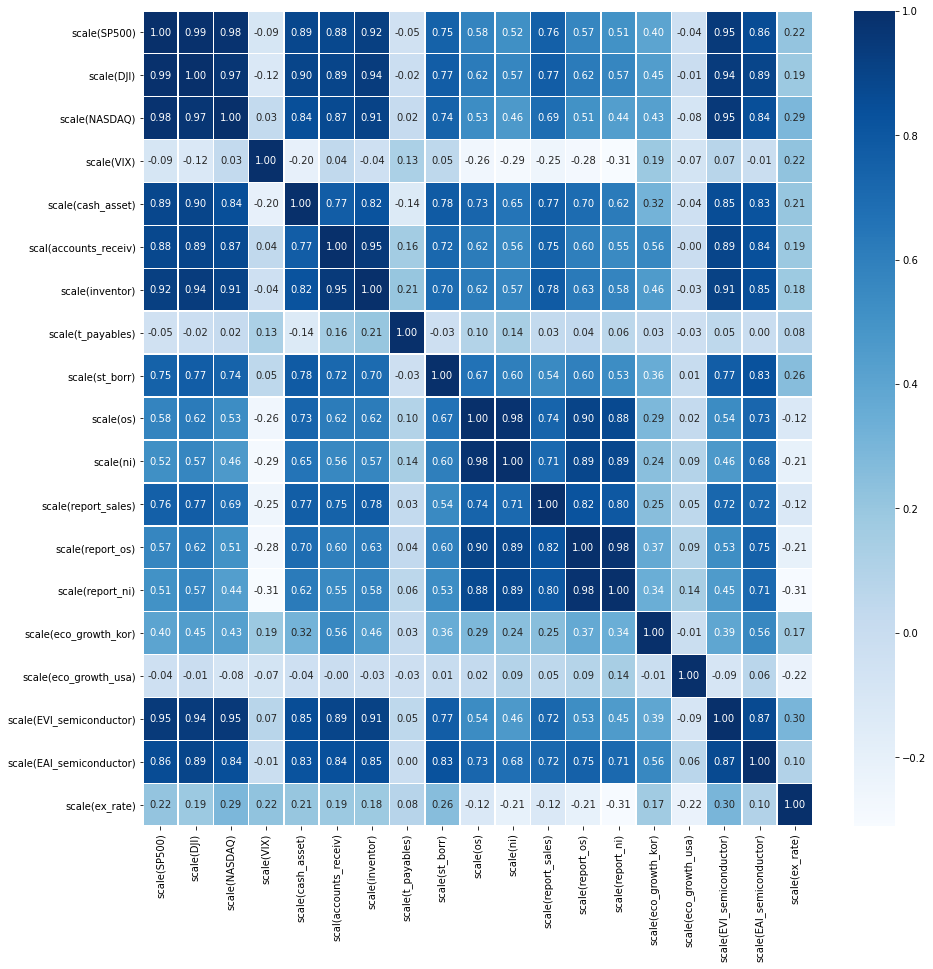

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(data = x_data.corr(),annot = True,fmt = '.2f',linewidths = .5,cmap = 'Blues')

**<VIF테스트는 Valuation Inflation Factor의 줄임말로써 한글로 분산팽창요소이다. 1부터 무한대의 값을 가지며 보통 10을 넘어가면 다중공선성을 의심한다. S&P500 VIF계수가 무려 5000이다. 히트맵과 비교하며 하나씩 지워나가는 시뮬레이션을 반복해 보자.>**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(x_data.values,i)for i in range(x_data.shape[1])]
vif['features'] = x_data.columns
vif

,VIF FACTOR,features
0,5035.276425,scale(SP500)
1,2852.904736,scale(DJI)
2,768.994583,scale(NASDAQ)
3,19.596371,scale(VIX)
4,135.237351,scale(cash_asset)
5,410.312164,scal(accounts_receiv)
6,422.612557,scale(inventor)
7,158.963511,scale(t_payables)
8,76.705519,scale(st_borr)
9,545.602105,scale(os)


**<최선의 조합은 이렇게 나왔다. 다중공선성이 작은 이 친구들을 가지고 다시 회귀분석을 시행해보자>**

In [ ]:
vif = pd.DataFrame()
x_data2=x_data.drop(['scale(SP500)','scale(os)','scale(inventor)','scale(report_sales)','scale(report_ni)','scale(DJI)','scal(accounts_receiv)','scale(EAI_semiconductor)','scale(ex_rate)','scale(NASDAQ)','scale(cash_asset)','scale(st_borr)','scale(ni)','scale(t_payables)'],axis = 1)
vif['VIF FACTOR'] = [variance_inflation_factor(x_data2.values,i)for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF FACTOR,features
0,4.791014,scale(VIX)
1,7.875886,scale(report_os)
2,4.483198,scale(eco_growth_kor)
3,3.002159,scale(eco_growth_usa)
4,8.014224,scale(EVI_semiconductor)


**<VIF테스트와 히트맵을 통해서 종속변수에 영향을 주는 19개의 독립변수중 5개의 독립변수만 추렸다>**

In [ ]:
x_data__ = x_data[['scale(report_os)','scale(EVI_semiconductor)','scale(VIX)','scale(eco_growth_kor)','scale(eco_growth_usa)']]
x_data__

,scale(report_os),scale(EVI_semiconductor),scale(VIX),scale(eco_growth_kor),scale(eco_growth_usa)
0,41757.11,30.31,24.62,2.80,1.50
1,41757.11,31.26,19.50,2.80,1.50
2,37531.99,31.26,17.59,2.80,1.50
3,37531.99,31.24,22.05,0.40,4.50
4,37531.99,27.84,32.07,0.40,4.50
...,...,...,...,...,...
127,64473.45,201.17,26.41,1.41,0.25
128,81462.92,229.78,26.27,1.41,0.25
129,81462.92,227.21,38.02,1.41,0.25
130,81462.92,242.76,20.57,1.41,0.25


In [ ]:
target=DF_SS_TOTAL[['rv_stock_price']]

In [ ]:
x_data__con = sm.add_constant(x_data__,has_constant = 'add')
multi_model = sm.OLS(target,x_data__con)
fitted_multi_model = multi_model.fit()


In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rv_stock_price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.80e-59
Time:                        12:49:25   Log-Likelihood:                -1293.3
No. Observations:                 132   AIC:                             2599.
Df Residuals:                     126   BIC:                             2616.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     8579.3219   1713.751      5.006      0.000    5187.859     1.2e+04
scale(report_os)             0.0620      0.015      4.274      0.000       0.033       0.091
scale(EVI_semiconductor)   197.1039      8.494     23.205      0.000     180.295     213.913
scale(VIX)                -123.8461     62.443     -1.983      0.050    -247.418      -0.274
scale(eco_growth_kor)     -203.5566    570.848     -0.357      0.722   -1333.247     926.134
scale(eco_growth_usa)     -314.9563    267.772     -1.176      0.242    -844.868     214.956
==============================================================================
Omnibus:                        4.480   Durbin-Watson:                   0.456
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                5.181
Skew:                          -0.173   Prob(JB):                       0.0750
Kurtosis:                       3.907   Cond. No.                     3.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**<회귀분석의 결과 한국과 미국 경제성장률의 유의 확률이 너무 높았다 한국의 경제성장률 변수를 지워도 미국의 경제성장률 변수가 여전히 5%가 높았기에 과감히 지웠다. 하여 최종적인 모델은 이렇게 나온다>** 

In [ ]:
x_data__ = x_data[['scale(report_os)','scale(EVI_semiconductor)','scale(VIX)']]
x_data__

,scale(report_os),scale(EVI_semiconductor),scale(VIX)
0,41757.11,30.31,24.62
1,41757.11,31.26,19.50
2,37531.99,31.26,17.59
3,37531.99,31.24,22.05
4,37531.99,27.84,32.07
...,...,...,...
127,64473.45,201.17,26.41
128,81462.92,229.78,26.27
129,81462.92,227.21,38.02
130,81462.92,242.76,20.57


In [ ]:
target=DF_SS_TOTAL[['rv_stock_price']]

In [ ]:
x_data__con = sm.add_constant(x_data__,has_constant = 'add')
multi_model = sm.OLS(target,x_data__con)
fitted_multi_model = multi_model.fit()

In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rv_stock_price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     353.0
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.07e-61
Time:                        12:49:31   Log-Likelihood:                -1294.1
No. Observations:                 132   AIC:                             2596.
Df Residuals:                     128   BIC:                             2608.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7921.6475   1595.876      4.964      0.000    4763.935    1.11e+04
scale(report_os)             0.0581      0.014      4.253      0.000       0.031       0.085
scale(EVI_semiconductor)   198.0617      8.255     23.994      0.000     181.728     214.395
scale(VIX)                -129.4104     59.847     -2.162      0.032    -247.828     -10.993
==============================================================================
Omnibus:                        4.841   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                6.155
Skew:                          -0.141   Prob(JB):                       0.0461
Kurtosis:                       4.019   Cond. No.                     3.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **BUT 여전히 다중 공선성의 문제가 남아있음을  warnings의 2번을 통해서 알 수 있었다([2] The condition number is large, 3.55e+05. This might indicate that there are strong multicollinearity or other numerical problems.). 그리하여 다시 scale을  데이터 scale을 진행하였다.**

## DATE Scale

**<우선 x변수들의 데이터프레임을 리스트 화한다. 왜냐하면 우리는 지금까지와 다르게 scale을 하기위해 회귀분석의 식을 OLS.from_formula 로 나타내고 변수들 하나하나에 scale을 씌우기 쉽게하기 위함이다.>**

In [ ]:
x_var_list = list(x_data__)
x_var_list

['scale(report_os)', 'scale(EVI_semiconductor)', 'scale(VIX)']

**<x 변수들을 일일이 scale에 넣는 모양을 만들어서 새로이 x_var_list를 만든다>**

In [ ]:
x_var_list = ["scale({})".format(name) for name in x_var_list]

In [ ]:
multi_model = sm.OLS.from_formula("rv_stock_price ~ " + "+".join(x_var_list),data = DF_SS_TOTAL)
fitted_multi_model = multi_model.fit()

In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rv_stock_price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     353.0
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.07e-61
Time:                        12:49:59   Log-Likelihood:                -1294.1
No. Observations:                 132   AIC:                             2596.
Df Residuals:                     128   BIC:                             2608.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.319e+04    387.143     85.726      0.000    3.24e+04     3.4e+04
scale(scale(report_os))          2092.7372    492.036      4.253      0.000    1119.161    3066.314
scale(scale(EVI_semiconductor))  1.136e+04    473.302     23.994      0.000    1.04e+04    1.23e+04
scale(scale(VIX))                -907.2571    419.571     -2.162      0.032   -1737.449     -77.065
==============================================================================
Omnibus:                        4.841   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                6.155
Skew:                          -0.141   Prob(JB):                       0.0461
Kurtosis:                       4.019   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ! 다중공선성의 문제가 해결된 지금 회귀분석 요약표를 살펴보면 scale 이전과 결정계수 유의 확률은 모두 같지만 눈에띄게 큰 차이가 있다. **바로 독립변수의 계수들**이다

### ** Scale 이후의 독립변수의 계수들을 보면 차이가 매우 심한데 영업이익의 계수는 소수점대에서 2000까지 치솟았다. ..**

### 결론: 바야흐로 대 주식의 시대이다. 일반인들이 시장에서 쉽게 얻을 수 있는 정보 중 삼성전자의 주가에 영향을 미치는 가장 중요한 변수가 무엇일까에 대해 알아보았는데 **재무제표의 요소들은 서로 유기적으로 연결되어 있기 때문에 다중공산성문제로 모두 탈락하였다.** 

### 결론적으로 세 가지의 발표를 유의 깊게 관찰하면 된다. **1.영업이익 실적 발표  2.vix(변동성지수) 3.반도체 수출물량지수** 이 세가지를 가지고 삼성전자의 주가를 80&정도 설명할 수 있다.

# 번외)) scikit-learn을 이용한 주가예측


### 이쯤되니 우리가 만든 모델로 진짜 주가 예측이 가능할 까 궁금해졌다. 그리하여 다음달의 주가를 예측해보기로 한다. 다음달의 주가를 알기 위한 변수는 내가 만든 모델에서 총 3가지이다. **4분기 반도체 수출물량 지수** / **4분기 영업이익 실적** / **미래의 변동성 지수** 

**sklearn을 사용한다.**

In [ ]:
from sklearn.model_selection import train_test_split
x = x_data[['scale(VIX)', 'scale(report_os)', 'scale(EVI_semiconductor)']]
y = DF_SS_TOTAL[['rv_stock_price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

**그래프를 그리기 위해 테스트 데이터와 사이즈 데이터로 나눈다**

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**VIX = 22.869(10%상승) / REPORT_OS = 111179.1(10%하락조정) / EVI_SEMI = 267.036**

In [ ]:
ss_x = [[22.869 , 111179.1 , 267.036]]
my_predict = mlr.predict(ss_x)
my_predict

array([[63806.90773954]])

**63806원으로 현재의 주가와 5000원 정도의 괴리 발생^^**

**그림을 그려 예상 값과 모델로 나온 테스트의 값들이 동일한지 확인 하는 검정을 눈으로 해본다**

In [ ]:
y_predict = mlr.predict(x_test)

**변수의 수가 적어서 그런지 아무래도 예측력은 떨어진다**

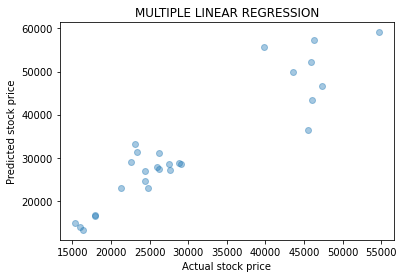

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual stock price")
plt.ylabel("Predicted stock price")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()


​


#**----------------------------------------이상-------------------------------------------**